In [1]:
#KNN MODEL

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import time

In [3]:
#dataset = pd.read_csv(r'C:\Users\Indatech\Downloads\EMG\Dataset\EMG-data.csv', delimiter=',')

#dataset=dataset.drop(columns=["time"])  #No necesitamos la columna del tiempo
#dataset=dataset.drop(columns=["channel5"])  #Borra canal 5
#dataset=dataset.drop(columns=["channel6"])  #Borra canal 6
#dataset=dataset.drop(columns=["channel7"])  #Borra canal 7
#dataset=dataset.drop(columns=["channel8"])  #Borra canal 8
#dataset = dataset.drop(dataset[dataset["class"] == 0].index)
#dataset = dataset.drop(dataset[dataset["class"] == 5].index)  #Borra Radial deviations
#dataset = dataset.drop(dataset[dataset["class"] == 6].index)  #Borra Ulnar deviations
#dataset = dataset.drop(dataset[dataset["class"] == 7].index)  #Borra Extended palm
#dataset.to_csv("filtered_data.csv", index=False)

#AQUI, COMO YA TENEMOS LA DATA FILTRADA PREVIAMENTE DEL PREPROCESAMIENTO DE LOS OTROS MODELOS, NOS AHORRAMOS LA MODIFICACION DEL DATASET
dataset = pd.read_csv(r'C:\Users\Indatech\Downloads\EMG\filtered_data.csv', delimiter=',')

print(dataset.head())

print(dataset.shape)

   channel1  channel2  channel3  channel4  class  label
0  -0.00001   0.00000  -0.00001   0.00000      1      1
1  -0.00001  -0.00002   0.00000  -0.00001      1      1
2  -0.00001  -0.00002   0.00000  -0.00001      1      1
3  -0.00001  -0.00002   0.00000  -0.00001      1      1
4  -0.00001  -0.00002   0.00000  -0.00001      1      1
(994312, 6)


In [4]:
features = dataset.drop(columns=["label","class"])  #CLASS son los gestos que se leen, LABELS son los sujetos haciendo los movimientos (hay 30+)
labels = dataset["class"]
features.head()  #ATTRIBUTES serian todas las señales detectadas

print(labels.unique())
print("Value Count :\n", labels.value_counts())
print("Shapes: ", features.shape, labels.shape)

[1 2 3 4]
Value Count :
 class
4    251570
1    250055
3    249494
2    243193
Name: count, dtype: int64
Shapes:  (994312, 4) (994312,)


In [5]:
print(features.head())
print(labels.head())

   channel1  channel2  channel3  channel4
0  -0.00001   0.00000  -0.00001   0.00000
1  -0.00001  -0.00002   0.00000  -0.00001
2  -0.00001  -0.00002   0.00000  -0.00001
3  -0.00001  -0.00002   0.00000  -0.00001
4  -0.00001  -0.00002   0.00000  -0.00001
0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


In [6]:
print(type(labels))
print(type(features))

Class = labels.values
features_2 = features.values

print(type(Class))
print(type(features_2))  #CAMBIADO PARA PROBAR CUÁL FUNCIONA MÁS

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# Divide en entrada (X) y salida (Y), variables de entrenamiento y prueba 
x_train, x_test, y_train, y_test = train_test_split(features_2, Class, test_size=0.2, random_state=42)
print(x_train[:5])
print("Shapes: ", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

[[-6.0e-05 -9.0e-05 -5.0e-05 -9.0e-05]
 [ 7.1e-04  3.2e-04  9.0e-05  3.2e-04]
 [-1.0e-05  1.0e-05  0.0e+00  1.0e-05]
 [ 0.0e+00  1.0e-05 -3.0e-05  1.3e-04]
 [-8.0e-05  1.0e-04 -3.0e-05  9.0e-05]]
Shapes:  (795449, 4) (198863, 4) (795449,) (198863,)


In [8]:
print(x_train.shape[1:])
print(y_train[:15])

(4,)
[4 2 1 4 2 2 1 4 2 3 2 2 4 1 4]


In [9]:
#y_train_pre = y_train - 1   #TODAS LAS CLASES DISMINUYEN UN NUMERO
#y_test_pre = y_test - 1

In [10]:
#print(y_train[:15])

In [11]:
# NORMALIZANDO
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [12]:
n_neigh = 10
leaf_size = 5
knn=KNeighborsClassifier(metric='minkowski',algorithm= 'auto',n_neighbors=n_neigh,p=2,weights='distance',leaf_size=leaf_size)

knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=10, weights='distance')

In [13]:
y_test_pred=knn.predict(x_test)

In [14]:
#OBTENIENDO PARAMETROS IMPORTANTES

y=f1_score(y_test,y_test_pred,average='macro') 
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
print('With leaf size:', leaf_size, ' and n neighbors: ', n_neigh)
print(y)
print(x)
print(a)

With leaf size: 5  and n neighbors:  10
0.9497148198306812
[[48287   391   610   645]
 [ 1096 46475   591   720]
 [ 2314   597 46334   300]
 [ 1683   726   365 47729]]
0.9495230384737231


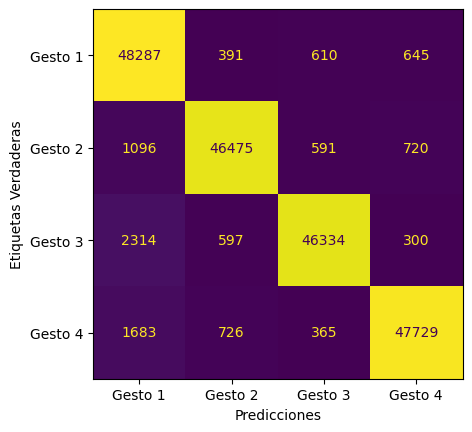

In [15]:
#Generamos la matriz de confusion
labels = ['Gesto 1', 'Gesto 2', 'Gesto 3', 'Gesto 4'] # Etiquetas correctas para las clases
cm_display = ConfusionMatrixDisplay(confusion_matrix = x, display_labels=labels)

cm_display.plot(colorbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

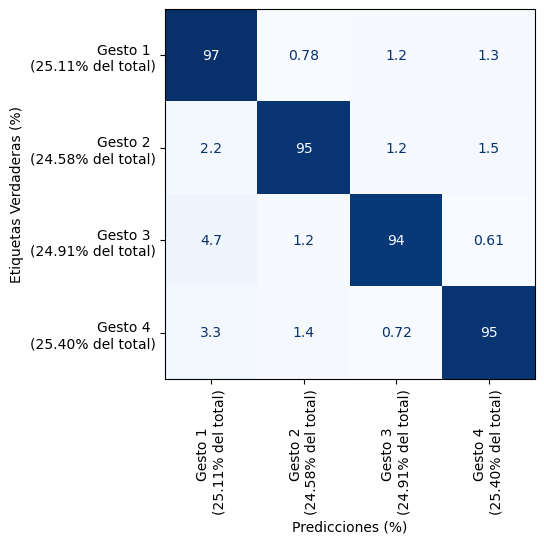

In [16]:
# Normaliza la matriz de confusión para obtener porcentajes
cm_norm = x.astype('float') / x.sum(axis=1)[:, np.newaxis] * 100

# Calcular la suma de cada fila para obtener el número total de predicciones para cada clase
total_predictions_per_class = x.sum(axis=1)

# Calcular el porcentaje que representa cada fila en la cantidad total de datos del conjunto
total_data = total_predictions_per_class.sum()
percentages_per_class = (total_predictions_per_class / total_data) * 100

# Crear una lista de etiquetas con los porcentajes
labels_with_percentages = [f'{label} \n({percent:.2f}% del total)' for label, percent in zip(labels, percentages_per_class)]

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labels_with_percentages)

cm_display.plot(cmap='Blues',xticks_rotation='vertical', colorbar=False)  # Lo colocamos azul para distinguir

plt.xlabel('Predicciones (%)')
plt.ylabel('Etiquetas Verdaderas (%)')


plt.show()

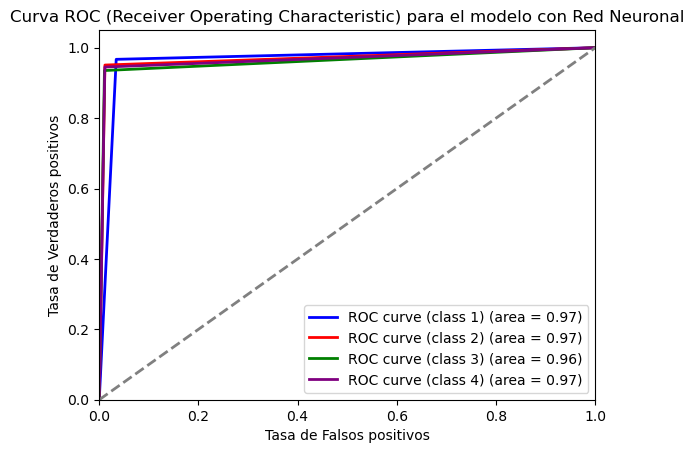

In [18]:
#PLOTEA LA CURVA ROC DE LA MATRIZ DE CONFUSION
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

test_y_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
predictions_onehot= label_binarize(y_test_pred, classes=[1, 2, 3, 4])

for i in range(4):  # 4 clases o gestos para clasificars
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], predictions_onehot[:, i])  # Assuming 'y_true' and 'y_scores' are arrays with shape (n_samples, num_classes)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotea curvas ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green', 'purple']  # Ajustando los colores
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class {0}) (area = {1:0.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('Curva ROC (Receiver Operating Characteristic) para el modelo con Red Neuronal')
plt.legend(loc="lower right")
plt.show()

In [19]:
# PROBANDO RENDIMIENTO CON UNA COMBINACION DE N VECINOS Y TAMAÑO DE HOJA DIFERENTE

n_neigh = 20 # Por lo general, entre 5 y 50, pero puede ser mayor o menor dependiendo de los factores anteriores.
leaf_size = 15 #A menudo se elige entre 30 y 100, pero nuevamente, se ajusta en función de las necesidades específicas.
knn=KNeighborsClassifier(metric='minkowski',algorithm= 'auto',n_neighbors=n_neigh,p=2,weights='distance',leaf_size=leaf_size)

star_time = time.time()
knn.fit(x_train,y_train)
end_time = time.time()

print("Tiempo de entrenamiento: ", (end_time-star_time))

Tiempo de entrenamiento:  11.523304224014282


In [21]:
y_test_pred=knn.predict(x_test)

In [22]:
#OBTENIENDO PARAMETROS IMPORTANTES

y=f1_score(y_test,y_test_pred,average='macro') 
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
print('With leaf size:', leaf_size, ' and n neighbors: ', n_neigh)
print(y)
print(x)
print(a)
print("Numero total de instancias por clase: ", np.sum(x, axis=1))

With leaf size: 15  and n neighbors:  20
0.950809690479707
[[48305   391   611   626]
 [ 1064 46470   629   719]
 [ 2257   584 46449   255]
 [ 1642   684   356 47821]]
0.9506293277281345
Numero total de instancias por clase:  [49933 48882 49545 50503]


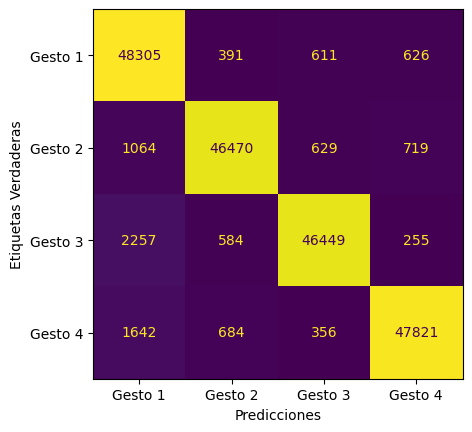

In [23]:
#Generamos la matriz de confusion
labels = ['Gesto 1', 'Gesto 2', 'Gesto 3', 'Gesto 4'] # Etiquetas correctas para las clases
cm_display = ConfusionMatrixDisplay(confusion_matrix = x, display_labels=labels)

cm_display.plot(colorbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

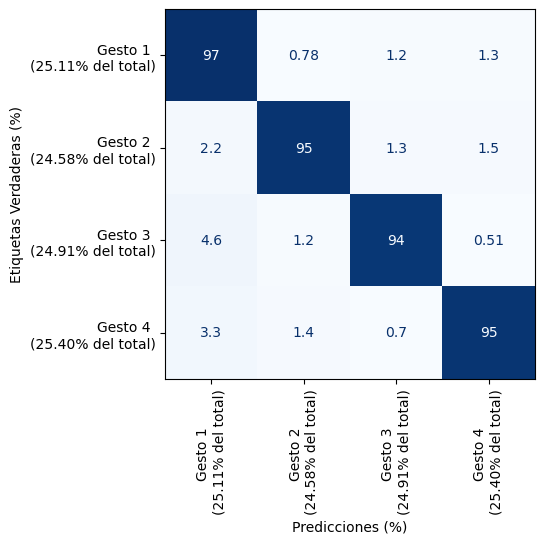

In [24]:
# Normaliza la matriz de confusión para obtener porcentajes
cm_norm = x.astype('float') / x.sum(axis=1)[:, np.newaxis] * 100

# Calcular la suma de cada fila para obtener el número total de predicciones para cada clase
total_predictions_per_class = x.sum(axis=1)

# Calcular el porcentaje que representa cada fila en la cantidad total de datos del conjunto
total_data = total_predictions_per_class.sum()
percentages_per_class = (total_predictions_per_class / total_data) * 100

# Crear una lista de etiquetas con los porcentajes
labels_with_percentages = [f'{label} \n({percent:.2f}% del total)' for label, percent in zip(labels, percentages_per_class)]

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labels_with_percentages)

cm_display.plot(cmap='Blues',xticks_rotation='vertical', colorbar=False)  # Lo colocamos azul para distinguir

plt.xlabel('Predicciones (%)')
plt.ylabel('Etiquetas Verdaderas (%)')


plt.show()

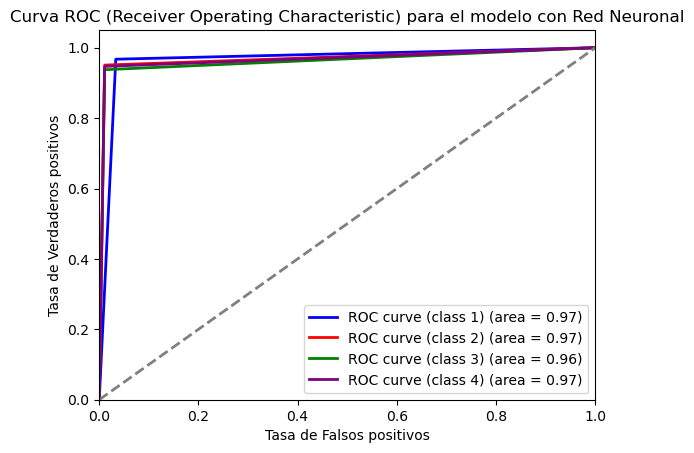

In [25]:
#PLOTEA LA CURVA ROC DE LA MATRIZ DE CONFUSION
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

test_y_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
predictions_onehot= label_binarize(y_test_pred, classes=[1, 2, 3, 4])

for i in range(4):  # 4 clases o gestos para clasificars
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], predictions_onehot[:, i])  # Suponiendo que 'y_true' y 'y_scores' son matrices con forma (n_samples, num_classes)    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotea curvas ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green', 'purple']  # Ajustando colores
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class {0}) (area = {1:0.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('Curva ROC (Receiver Operating Characteristic) para el modelo con Red Neuronal')
plt.legend(loc="lower right")
plt.show()

In [26]:
#GUARDANDO EL MODELO
from joblib import dump

filename = 'knn_model.joblib' #Va a la carpeta general 
dump(knn, filename)  # Guarda

['knn_model.joblib']